# Mathematical Pendulum

### Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Data

In [17]:
# frequency and period
freq = np.array([1490, 1208, 1063, 919, 780, 357, 640, 499])
period = 1/freq

# wavelength
la = np.array([260, 300, 340, 380, 430, 970, 550, 710]) / 1000

### Define Plots

In [6]:
def plot_error(x_data, y_data, x_error, y_error, x_label='', y_label='', title='', label=''):
    plt.style.use('seaborn-v0_8-whitegrid')
    # plt.figure(figsize=(10,5), dpi=300) # for print
    plt.figure(figsize=(8,5)) # for screen
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.errorbar(x_data, y_data, yerr=y_error, xerr=x_error, fmt='.', ecolor='black', capsize=2, label=label)
    return plt

def plot_data(x_data, y_data, x_label='', y_label='', title='', label=''):
    return plot_error(x_data, y_data, x_error=0, y_error=0, x_label=x_label, y_label=y_label, title=title, label=label)

### Plot Data

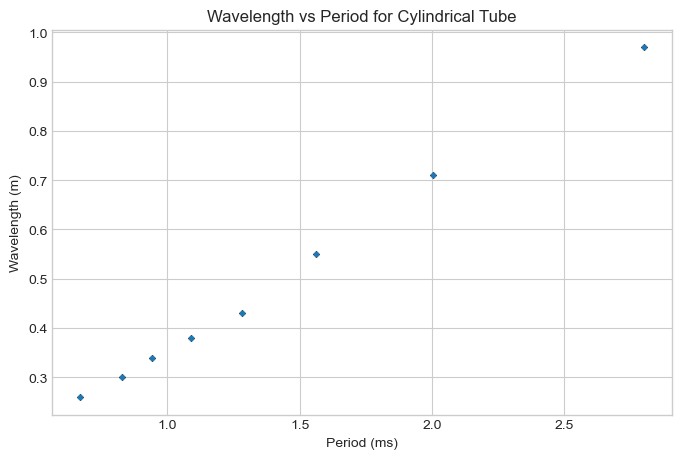

In [18]:
x_label = 'Period (ms)'
y_label = 'Wavelength (m)'
title = 'Wavelength vs Period for Cylindrical Tube'

graph_TL = plot_data(period*1000, la, x_label=x_label, y_label=y_label, title=title)
graph_TL.show()

### Errors

In [27]:
# frequency error Hz
df = 2

# error for period
dT = df/freq * period

# length error in m
dl = 0.01

### Plot graph with error bars

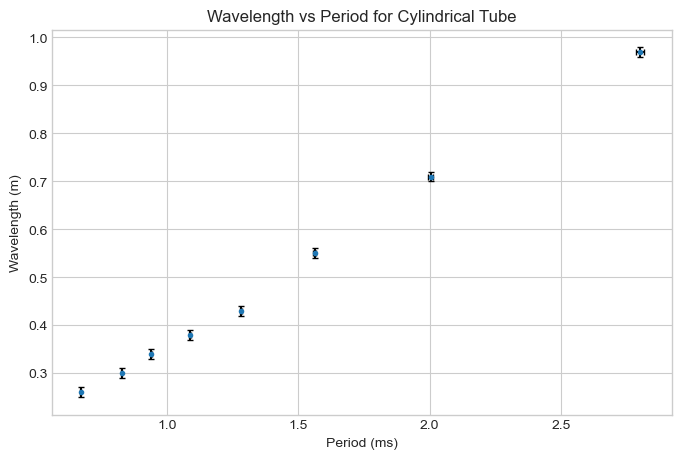

In [28]:
graph_TL = plot_error(period*1000, la, dT*1000, dl, x_label=x_label, y_label=y_label, title=title)
graph_TL.show()

### Define Fit Function

In [29]:
def f(x, a):
    return a * x

### Calculate Fit Parameters and Plot Best Fit

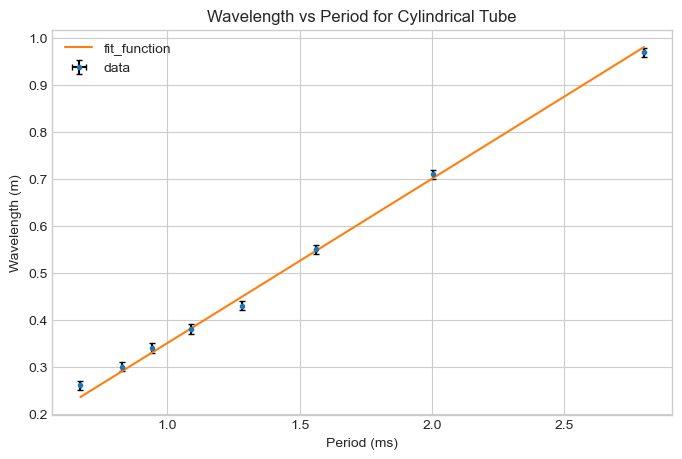

In [30]:
a_optimal, cov = curve_fit(f, period, la)

x = np.linspace(min(period)*1000, max(period)*1000, 1000)
y = f(x/1000, a_optimal)

graph_TL = plot_error(period*1000, la, dT, dl, x_label=x_label, y_label=y_label, title=title, label='data')
graph_TL.plot(x, y, label='fit_function')
graph_TL.legend()
graph_TL.show()


### Calculate Residuals and Show Residual Plot

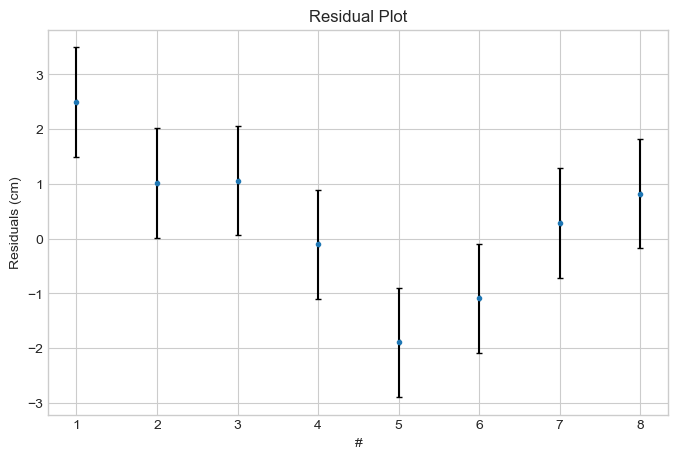

In [34]:
title = 'Residual Plot'
x_label = '#'
y_label = 'Residuals (cm)'

res = (la - f(period, a_optimal)) * 100

res_plot = plot_error(range(1, len(period)+1), res, 0, dl*100, x_label=x_label, y_label=y_label, title=title)
res_plot.show()


### Calculate Speed of Sound

#### from data points

v = (356.05250 ± 9.70000) m/s = (356 ± 10) m/s


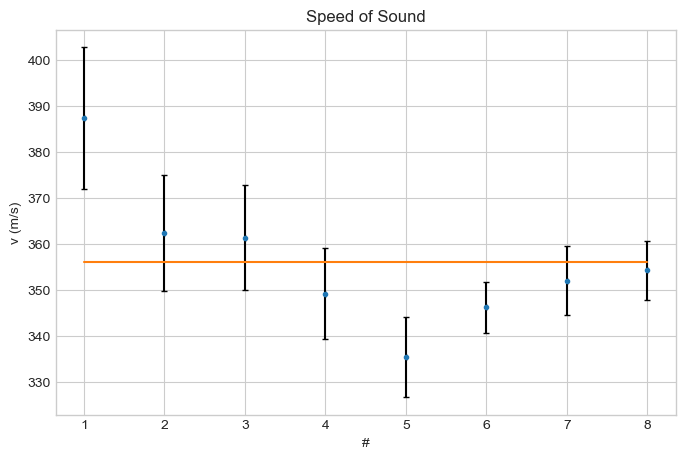

In [38]:
v = la * freq
v_mean = v.mean()
N = len(v)

vmax = (la+dl) * (freq+df)
dv = (vmax - v)
dv_mean = dv.mean()


print(f'v = ({v_mean:.5f} ± {dv_mean:.5f}) m/s = ({v_mean:.0f} ± {dv_mean:.0f}) m/s')

title = 'Speed of Sound'
y_label = 'v (m/s)'
v_plot = plot_error(range(1, N+1), v, 0, dv, x_label=x_label, y_label=y_label, title=title)

plt.plot(range(1, N+1), [v_mean]*N)
plt.show()

#### from fit parameter

In [42]:
v_fit = (a_optimal)[0]

# simulate error for g

N = 1000 # number of simulation runs

a_min = a_optimal

for i in range(N):
    period_rnd = period - dT + 2 * np.random.rand(1) * dT
    la_rnd = la - dl + 2 * np.random.rand(1) * dl

    a_rnd, cov_rnd = curve_fit(f, period_rnd, la_rnd)
    a_min = min(a_rnd, a_min)

v_min = a_min[0]

dv = (v_fit - v_min)

print(f'v = ({v_fit:.5f} ± {dv:.5f}) m/s = ({v_fit:.0f} ± {dv:.0f}) m/s')


v = (350.18437 ± 7.10668) m/s = (350 ± 7) m/s
